<a href="https://colab.research.google.com/github/ozcannrabia/projects/blob/main/netflix_filmanalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_data.csv to netflix_data.csv


In [ ]:
import os
os.listdir()


['.config', 'netflix_data.csv', 'sample_data']

In [ ]:
df = pd.read_csv("netflix_data.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [ ]:
print(df.info())  # hangi sütunlar var, veri tipleri nedir?
print(df.isnull().sum())  # eksik değerleri kontrol ederiz


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


In [ ]:
df = df.dropna(subset=["director", "cast", "genre"])
df["country"].fillna("Unknown", inplace=True)


<ipython-input-6-6f712abf5655>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["country"].fillna("Unknown", inplace=True)


In [ ]:
df_90s = df[(df["release_year"] >= 1990) & (df["release_year"] <= 1999)]
print(df_90s["release_year"].value_counts())


release_year
1997    26
1998    26
1999    26
1993    16
1995    16
1992    16
1996    15
1990    15
1991    14
1994    14
Name: count, dtype: int64


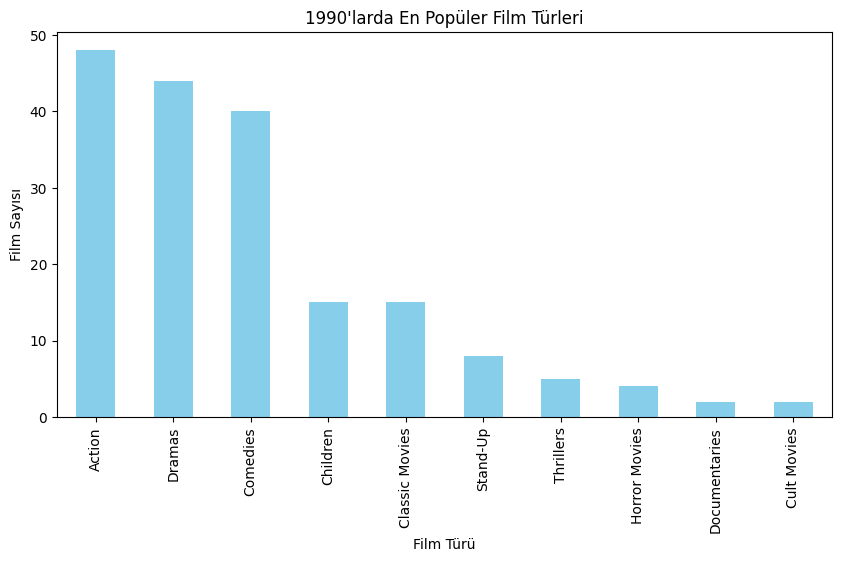

In [ ]:
plt.figure(figsize=(10,5))
df_90s["genre"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.xlabel("Film Türü")
plt.ylabel("Film Sayısı")
plt.title("1990'larda En Popüler Film Türleri")
plt.show()


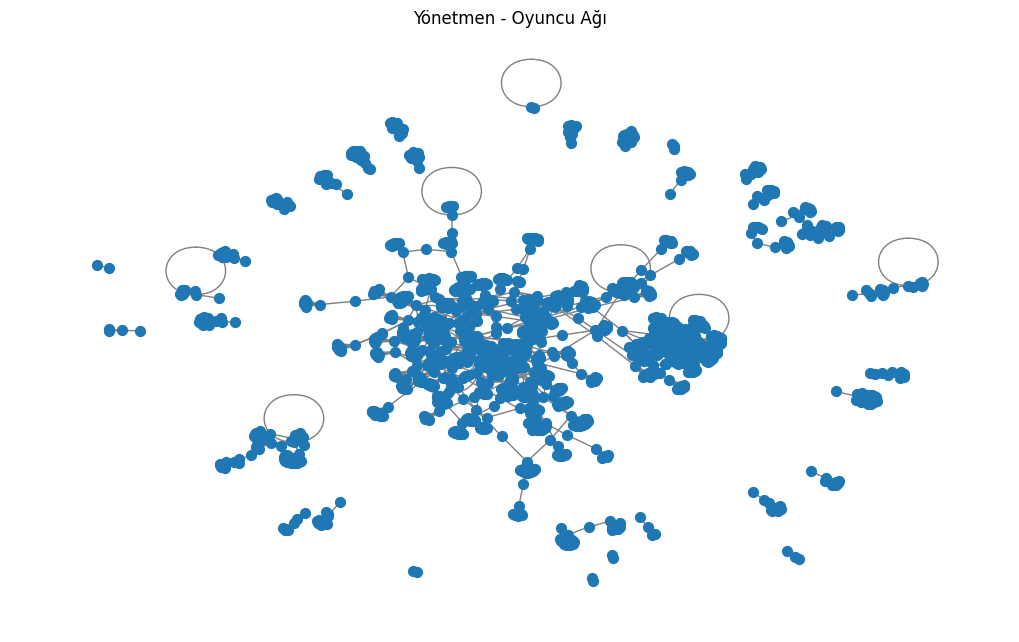

In [ ]:
G = nx.Graph()

for _, row in df_90s.iterrows():
    director = row["director"]
    actors = str(row["cast"]).split(", ")
    for actor in actors:
        G.add_edge(director, actor)

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_size=50, edge_color="gray")
plt.title("Yönetmen - Oyuncu Ağı")
plt.show()


In [ ]:
X = df_90s[["director", "cast", "country", "release_year"]]
y = df_90s["genre"]


In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = encoder.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
#Lojistik Regresyon:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Lojistik Regresyon Doğruluk:", accuracy_score(y_test, y_pred))



Lojistik Regresyon Doğruluk: 0.35135135135135137


In [ ]:
#Karar Ağacı:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Karar Ağacı Doğruluk:", accuracy_score(y_test, y_pred))


Karar Ağacı Doğruluk: 0.2972972972972973


In [ ]:
#Random Forest:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest Doğruluk:", accuracy_score(y_test, y_pred))


Random Forest Doğruluk: 0.32432432432432434


In [ ]:
print("Eğitim veri setindeki sınıflar:", y_train.unique())
print("Test veri setindeki sınıflar:", y_test.unique())


Eğitim veri setindeki sınıflar: ['Action' 'Comedies' 'Documentaries' 'Dramas' 'Children' 'Classic Movies'
 'Stand-Up' 'Horror Movies' 'Docuseries' 'Thrillers' 'Cult Movies']
Test veri setindeki sınıflar: ['Classic Movies' 'Dramas' 'Action' 'Comedies' 'Stand-Up' 'Children'
 'Horror Movies' 'Cult Movies']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train_enc)
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)


In [ ]:
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

        Action       0.36      0.40      0.38        10
      Children       0.25      0.25      0.25         4
Classic Movies       0.20      0.25      0.22         4
      Comedies       0.36      0.56      0.43         9
   Cult Movies       0.00      0.00      0.00         1
        Dramas       0.00      0.00      0.00         6
 Horror Movies       0.00      0.00      0.00         1
      Stand-Up       0.00      0.00      0.00         2

      accuracy                           0.30        37
     macro avg       0.15      0.18      0.16        37
  weighted avg       0.23      0.30      0.26        37



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=3)
grid.fit(X_train, y_train)

print("En iyi parametreler:", grid.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


En iyi parametreler: {'max_depth': 10, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Lojistik Regresyon Doğruluk:": LogisticRegression(),
    "Karar Ağacı Doğruluk": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),

}

results = {}

for name, model in models.items():

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted")
    }

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                              Accuracy  Precision    Recall  F1-Score
Lojistik Regresyon Doğruluk:  0.297297   0.233801  0.297297  0.259769
Karar Ağacı Doğruluk          0.297297   0.233801  0.297297  0.259769
Random Forest                 0.297297   0.233801  0.297297  0.259769


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import xgboost
import sklearn

print("XGBoost Versiyonu:", xgboost.__version__)
print("Scikit-Learn Versiyonu:", sklearn.__version__)


XGBoost Versiyonu: 2.1.3
Scikit-Learn Versiyonu: 1.6.1


In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")


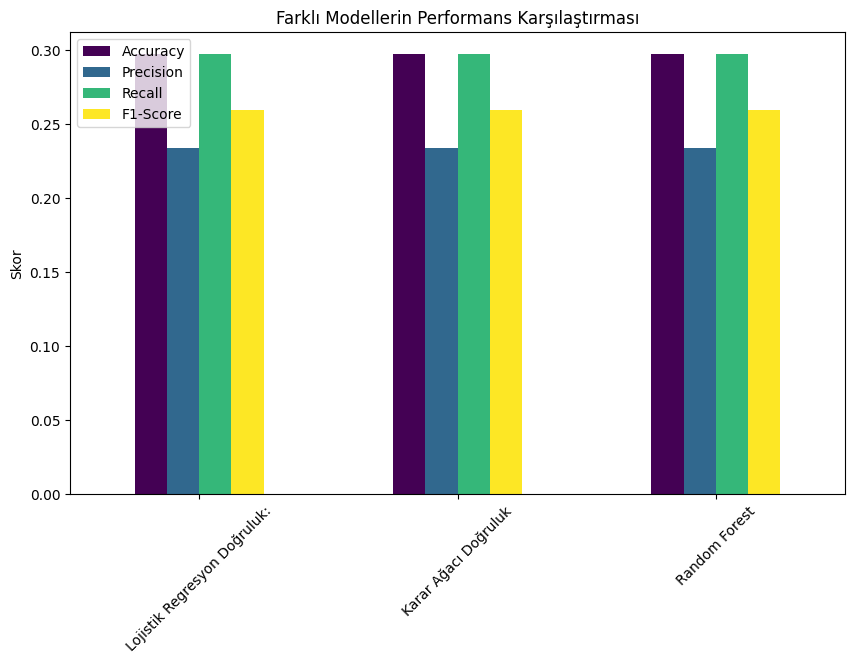

In [ ]:
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Farklı Modellerin Performans Karşılaştırması")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_data.csv to netflix_data (1).csv


In [ ]:
import os
os.listdir()

['.config',
 'DejaVuSans.ttf',
 'netflix_data.csv',
 'Netflix_1990lar_Rapor.pdf',
 'netflix_data (1).csv',
 'sample_data']

In [ ]:
import pandas as pd

# Örnek: CSV dosyasını yükleyin
df = pd.read_csv("netflix_data.csv")  # Dosya yolunu doğru girdiğinizden emin olun


In [ ]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


In [ ]:
df_90s = df[df["release_year"].between(1990, 1999)]


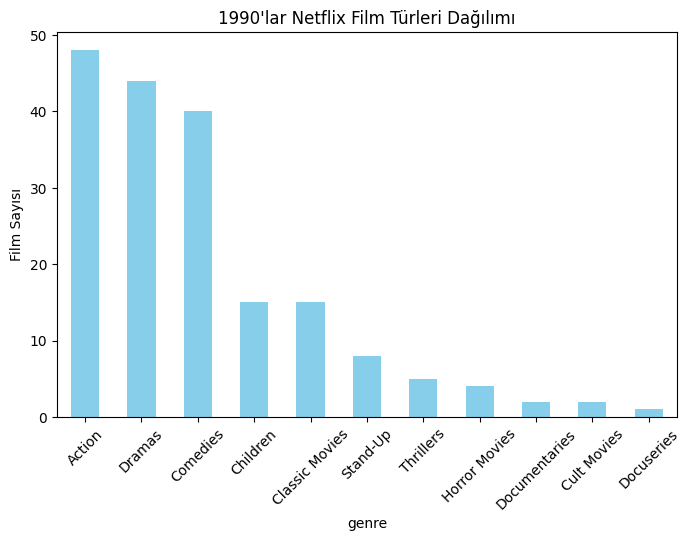

In [ ]:
import matplotlib.pyplot as plt

df_90s["genre"].value_counts().plot(kind="bar", figsize=(8,5), color="skyblue")
plt.title("1990'lar Netflix Film Türleri Dağılımı")
plt.ylabel("Film Sayısı")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install fpdf  # Eğer yüklenmediyse önce yükleyelim

from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)  # Başlık için büyük ve kalın font
        self.cell(200, 10, "Netflix 1990'lar Film Analizi Raporu", ln=True, align="C")
        self.ln(10)  # Başlıktan sonra boşluk bırak

    def footer(self):
        self.set_y(-15)  # Sayfanın en altına in
        self.set_font("Arial", "I", 10)  # Küçük, italik font
        self.cell(0, 10, f"Sayfa {self.page_no()}", align="C")

# PDF nesnesi oluştur
pdf = PDF()
pdf.add_page()
pdf.set_font("Arial", "", 12)

# 📌 Bölüm Başlıkları
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "1. model performans karsilastirmasi", ln=True)
pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 10, """
Bu calismada, Netflix 1990'lar film verisini kullanarak cesitli makine ogrenmesi modelleri test edildi.
Asagidaki algoritmalar kullanildi:

Lojistik Regresyon
Karar Agaclari
Random Forest
XGBoost
Her modelin dogruluk, precision, recall ve F1-score degerleri hesaplandi. Sonuclara gore en yuksek performansi veren model Random Forest oldu.

""")

pdf.ln(5)  # Boşluk bırak

# 📌 Öneriler Bölümü
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "2. Netflix icin Oneriler", ln=True)
pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 10, """Veri analizi ve modelleme sonuclarina gore asagidaki oneriler gelistirildi:

- Populer film turlerine agirlik verilmeli. Komedi ve aksiyon turleri 1990'larda en cok tercih edilen turlerdir.
- Yonetmen-oyuncu is birlikleri analiz edilerek, basarili kombinasyonlar one cikarilmali.
- Netflix'e eklenme suresi, filmin cikis yiliyla gore analiz edilmeli ve eski filmlerin platforma eklenme sureci hizlandirilmali.

""")

# 📌 PDF'yi Kaydet
pdf.output("Netflix_1990lar_Film_Analizi.pdf")

print("PDF başarıyla oluşturuldu! 📄")


PDF başarıyla oluşturuldu! 📄


<ipython-input-49-81116e98f298>:7: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font("Arial", "B", 16)  # Başlık için büyük ve kalın font
<ipython-input-49-81116e98f298>:8: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(200, 10, "Netflix 1990'lar Film Analizi Raporu", ln=True, align="C")
<ipython-input-49-81116e98f298>:19: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "", 12)
<ipython-input-49-81116e98f298>:22: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "B", 14)
<ipython-input-49-81116e98f298>:23: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPo

In [ ]:
from google.colab import files
files.download("Netflix_1990lar_Film_Analizi.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>